# Consigna práctico Análisis y Curación: Limpiando un Dataset
1. Importando los datos:
    - Verificar si no hay problemas en la importación: importar los datos, visualizarlos, análisis de tipos, corrección en los tipos de los datos de entrada.
    - Asegurar que el archivo sales posee Ids/Claves únicas. Para el resto de los archivos, ¿tenemos algún atributo que se comporte como clave única?, en caso positivo chequear que no se repite. En caso de no tener una clave única identificatoria, ¿sería relevante asignar una clave única a cada registro?, chequear que no existen datos duplicados para estos casos.
    - Despersonalizar los datos y guardarlos en un nuevo archivo. Tener en cuenta nunca modificar los datos crudos u originales.
2. Pasos necesarios para limpieza del dataset:
    - Etiquetas de variables/columnas: no usar caracteres especiales. Verificar que no haya problemas de codificación/encoding.
    - Tratar valores faltantes (NaN).
    - Codificar variables: las variables categóricas deberán ser tratadas como variables numéricas.
    - Verificar la consistencia de las variables: constatar que los valores de cada atributo tienen sentido, detectar valores que no son consistentes con el resto.
    - Identificar valores atípicos en nuestro dataset. ¿Qué es conveniente hacer con ellos? Evaluar cada caso.
    - Juntar las columnas de interés en un mismo DataFrame (Sales con Features).
    - Para simplificar el problema resamplear los datos ¿Transformar Weekly sales en ventas mensuales?. Graficar la distribución de las ventas mensuales para cada año para 5 tiendas a elección. Comparar sus distribuciones. ¿Se reconoce alguna distribución conocida?
    - Analizar correlación entre número departamento y ventas semanales/mensuales, ¿posee alguna incidencia el número de departamento sobre las ventas?, en caso negativo eliminar esta variable de nuestros dataframes.
    - Una vez que tenemos las features de interés de nuestro set de datos, aplicar algún método de normalización sobre los mismos, para evitar tener un sesgo de unas variables sobre otra (se pueden utilizar técnicas como z-score/min-max scaling). Guardar el dataset normalizado con un nombre representativo.
    - Finalmente, reducir los features de interés mediante sus combinaciones lineales (aplicando Principal Component Analysis). Guardar el dataset con nombre representativo.
    - Enumere formas eficientes de guardado y acceso de grandes volúmenes de datos.
    - Guardar todos los archivos depurados con nombres representativos.
Bonus: entregar el práctico corriendo en una imágen de Docker.

Material de lectura recomendado:

https://www.machinelearningplus.com/time-series/time-series-analysis-python/

https://towardsdatascience.com/playing-with-time-series-data-in-python-959e2485bff8

https://sebastianraschka.com/Articles/2014_about_feature_scaling.html

## Resolución práctico 2

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from scipy import stats

In [2]:
CURRENT_DIR = os.path.dirname('__file__')
DATASET_PATH = os.path.join(CURRENT_DIR, '../datasets')
features = pd.read_csv(os.path.join(DATASET_PATH, 'features.csv'), parse_dates=['Date'])
sales = pd.read_csv(os.path.join(DATASET_PATH, 'sales.csv'), parse_dates=['Date'])
stores = pd.read_csv(os.path.join(DATASET_PATH, 'stores.csv'))
users = pd.read_csv(os.path.join(DATASET_PATH, 'users.csv'))

- Primero creamos una copia de los datasets originales.

In [3]:
sales_1 = sales.copy()
stores_1 = stores.copy()
features_1 = features.copy()
users_1 = users.copy()

In [4]:
sales_1.rename(columns={'Sale Id':'Sale_Id'}, inplace=True)
#sales_1['Date'] = pd.to_datetime(sales_1['Date'])
#features_1['Date'] = pd.to_datetime(features_1['Date'])

- Agregamos columna IsMarkdown para los casos en los que hubo descuentos.

In [5]:
def replace_markdown(val):
    return val != 0

In [6]:
#Reemplazamos los valores nulos de markdown por 0 en la tabla is_markdown
is_markdown = features_1.copy()
is_markdown.MarkDown1.fillna(0, inplace=True)
is_markdown.MarkDown2.fillna(0, inplace=True)
is_markdown.MarkDown3.fillna(0, inplace=True)
is_markdown.MarkDown4.fillna(0, inplace=True)
is_markdown.MarkDown5.fillna(0, inplace=True)

In [7]:
tk = (is_markdown['MarkDown1']+is_markdown['MarkDown2']+is_markdown['MarkDown3']+is_markdown['MarkDown4']+is_markdown['MarkDown5'])

is_markdown=is_markdown.assign(IsMarkdown=tk.values)

features_1['IsMarkdown']= is_markdown['IsMarkdown'].apply(replace_markdown)

- Asegurar que el archivo sales posee Ids/Claves únicas.

In [8]:
a=sales_1[sales_1.duplicated(subset='Sale_Id', keep=False)]
#sales.duplicated(subset='Sale_Id')
a.sort_values(by='Sale_Id', ascending=False)

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Sale_Id
425795,425795,45,97,2012-03-08,6779.88,False,421422
421422,421422,45,97,2012-03-08,6779.88,False,421422
421263,421263,45,95,2012-04-27,50693.76,False,421263
425794,425794,45,95,2012-04-27,50693.76,False,421263
421198,421198,45,95,2011-01-28,45751.50,False,421198
425793,425793,45,95,2011-01-28,45751.50,False,421198
421181,421181,45,95,2010-01-10,46860.82,False,421181
425792,425792,45,95,2010-01-10,46860.82,False,421181
425791,425791,45,93,2012-10-19,2270.50,NaN,421011
421011,421011,45,93,2012-10-19,2270.50,NaN,421011


Tal como se observa en la tabla anterior, el archivo sales tiene 8452 filas duplicadas.
- Para el caso de **features** clave única podría ser la unión de los atributos Store+Date ya que dicha combinacion no debiera tener duplicados.
- Para el caso de **stores** la columna Store deberia ser una clave única sin duplicados.
- En la tabla **users** el atributo que se comporta como clave unica es la columna users


In [9]:
len(sales_1)

425796

In [10]:
sales_1.drop_duplicates(subset='Sale_Id', inplace=True)

In [11]:
users_1[users_1.duplicated(subset='Unnamed: 0', keep=False)]

,Unnamed: 0,users,stores


In [12]:
users_1[users_1.duplicated(subset='users', keep=False)]

,Unnamed: 0,users,stores


In [13]:
features_1['Col3']=features_1['Store'].map(str) + features_1['Date'].map(str) #creamos campo de clave unica

In [14]:
features_1[features_1.duplicated(subset='Col3', keep=False)]

,Unnamed: 0,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,IsMarkdown,Col3


Tal como puede verse ninguna de estas tres tablas de datos tiene valores duplicados en sus columnas de índices

### Despersonalizar los datos y guardarlos en un nuevo archivo

In [15]:
# Despersonalizar los datos y guardarlos en un nuevo archivo. Tener en cuenta nunca modificar los datos crudos u originales
users1=users[['Unnamed: 0', 'stores']]

In [16]:
from hashlib import md5

In [17]:
def hashit(val):
    return md5(val.encode('utf-8'))

users_1['users']=users_1['users'].apply(hashit)


In [18]:
users_1.head(5)

,Unnamed: 0,users,stores
0,0,<md5 HASH object @ 0x7f0c2d1b93f0>,16-32-7-44
1,1,<md5 HASH object @ 0x7f0c2d1b9788>,20-37-10-11
2,2,<md5 HASH object @ 0x7f0c2d1b9d28>,34-14-18-16-29
3,3,<md5 HASH object @ 0x7f0c2d1b9620>,22-14-39-25
4,4,<md5 HASH object @ 0x7f0c2d1b9b98>,31-7-27-21-13


In [19]:
# Etiquetas de variables/columnas: no usar caracteres especiales. Verificar que no haya problemas de codificación/encoding.

- Asegurar que las etiquetas de las variables no contengan caracteres especiales.

In [20]:
char_regex = r'^(\w+)$'
sales_1.columns[~sales_1.columns.str.match(char_regex)]

Index(['Unnamed: 0'], dtype='object')

In [21]:
stores_1.columns[~stores_1.columns.str.match(char_regex)]

Index(['Unnamed: 0'], dtype='object')

In [22]:
features_1.columns[~features_1.columns.str.match(char_regex)]

Index(['Unnamed: 0'], dtype='object')

In [23]:
users_1.columns[~users_1.columns.str.match(char_regex)]

Index(['Unnamed: 0'], dtype='object')

El único campo que contiene caracteres especiales es el campo 'Unnamed: 0' que se observa en todos los datasets. Esta columna no aporta nada y puede removerse.

In [24]:
sales_1.drop('Unnamed: 0', axis=1, inplace=True)
stores_1.drop('Unnamed: 0', axis=1, inplace=True)
features_1.drop('Unnamed: 0', axis=1, inplace=True)
users_1.drop('Unnamed: 0', axis=1, inplace=True)

No existen campos con cadenas de texto, salvo el nombre de los usuarios, el cual debe ser despersonalizado, con lo cual no lo analizarémos. Pero si hubiera alguna columna cuyo tipo fuera String, podría analizarse la rareza de los Strings utilizando ftfy.badness.

### Tratamiento de valores faltantes

In [25]:
# get the number of missing data points per column
sales_1.isnull().sum()

Store               0
Dept                0
Date                0
Weekly_Sales        0
IsHoliday       41705
Sale_Id             0
dtype: int64

In [26]:
len(sales_1)-len(sales_1.dropna()) #otra forma de calcular

41705

Hay 42.118 valores faltantes que pertenecen al feature IsHoliday. Esta medida en sí, no dice nada más que con cuantos valores debemos lidiar.

Primero tenemos que ver si en términos relativos su impacto.

In [27]:
len(sales_1.dropna())/len(sales_1)

0.9010721825556847

In [28]:
len(sales_1.dropna(subset=['IsHoliday']))/len(sales_1)

0.9010721825556847

Eliminar las filas que tienen NAN en la columna IsHoliday implicaria quedarse con el 90% de los datos del dataset original. Ahora verificamos si las fechas con faltantes en IsHoliday son aleatorias o si pertenecen a periodos continuos de tiempo:

In [29]:
#sales[sales.IsHoliday.isnull()]
sales_1[sales_1.IsHoliday.isnull()].sort_values(by='Date', ascending=True).drop_duplicates('Date')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Sale_Id
49252,6,4,2010-01-10,28762.65,NaN,49252
325466,34,37,2010-02-04,2272.93,NaN,325466
218556,23,13,2010-02-07,48544.56,NaN,218556
257472,27,6,2010-02-19,7866.78,NaN,257472
139553,15,11,2010-02-26,13570.44,NaN,139553
142836,15,35,2010-03-09,2303.00,NaN,142836
163822,17,54,2010-03-12,43.00,NaN,163822
78342,8,97,2010-03-19,16132.98,NaN,78342
396876,42,91,2010-03-26,34995.37,NaN,396876
254734,26,81,2010-04-06,19309.95,NaN,254734


Tal como se ve, las fechas con faltantes parecen ser aleatorias.

In [30]:
features_1.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
IsMarkdown         0
Col3               0
dtype: int64

Vamos a analizar en que casos todas las columnas de markdown son NaN, ya que en el análisis nuestro nos interesa solo saber si en una fecha hubo o no descuentos.

In [31]:
cols_to_check = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
features_1['is_na'] = features_1[cols_to_check].isnull().apply(lambda x: all(x), axis=1) 

In [32]:
len(features_1.dropna())/len(features_1)

0.2526251526251526

En el caso de la tabla features si eliminamos todas las filas con valores faltantes nos quedamos solo con el 25% de las filas. Por esto no seria recomendable descartar estas filas porque perderiamos mucha informacion de las columnas que no tienen valores faltantes, como temperatura y precio. Se podria ver la correlacion entre las ventas semanales y la existencia de descuento o no o alternativamente la correlación entre ventas semanales y cada una de las columnas de descuentos para los casos en que ninguna de ellas posee faltantes. Si no hubiera correlacion podriamos descartar estas columnas.

Cabe observar que en esta tabla tambien esta la variable IsHoliday y no tiene faltantes por lo que no seria necesario eliminar las filas con faltantes de la tabla sales.

In [33]:
len(features_1[features_1.is_na==True]) / len(features_1)

0.5054945054945055

Podemos ver que en la mitad de los registros del dataset, se encuetran todas las columnas MarkDown en nulo.

In [34]:
stores_1.isnull().sum()

Store    0
Type     0
Size     6
dtype: int64

In [35]:
len(stores_1.dropna())/len(stores_1)

0.8666666666666667

La tabla stores contiene 6 faltantes en la columna Size que representan 13,33% del data set. 

In [36]:
stores_1['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45])

In [37]:
stores_1['Type'].unique() #tipos de tiendas

array(['A', 'B', 'C'], dtype=object)

Analizando el dataset de Stores, podemos ver que existen 3 tipos distintos de tiendas (A, B y C). El único valor faltante en este dataset es el Size de 6 tiendas, el cual lo podemos rellenar con el promedio de Size para cada tipo de tienda.

In [38]:
store_a_avg = stores_1[stores_1.Type=='A'].Size.mean()
store_b_avg = stores_1[stores_1.Type=='B'].Size.mean()
store_c_avg = stores_1[stores_1.Type=='C'].Size.mean()

In [39]:
def replace_store_nan_size(store):
    if store.Size > 0:
        return store.Size

    if store.Type == 'A':
        return store_a_avg
    elif store.Type == 'B':
        return store_b_avg
    elif store.Type == 'C':
        return store_c_avg

In [40]:
stores_1['Size'] = stores_1.apply(replace_store_nan_size, axis=1)

In [41]:
stores_1.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

Ya completamos la información de las 6 tiendas faltantes con los respectivos promedios para cada tipo de tienda.

In [42]:
users_1.isnull().sum()

users     0
stores    0
dtype: int64

### Codificar variables: las variables categóricas deberán ser tratadas como variables numéricas.

Las unicas variables categoricas del dataset son IsHoliday y Type

In [43]:
from sklearn import preprocessing

In [44]:
def transform_categorical(dataset, column):
    # Create a label (category) encoder object
    le = preprocessing.LabelEncoder()
    # Fit the encoder to the pandas column
    le.fit(dataset[column])

    dataset[column] = le.transform(dataset[column]) 

Vamos a hacer una transformación de las variables categóricas Type de stores y IsHoliday de features y IsHoliday de sales.

In [45]:
transform_categorical(stores_1, 'Type')
transform_categorical(features_1, 'IsHoliday')
transform_categorical(sales_1, 'IsHoliday')
transform_categorical(features_1, 'IsMarkdown')

In [46]:
stores_1.head()

,Store,Type,Size
0,1,0,151315.000000
1,2,0,202307.000000
2,3,1,37392.000000
3,4,0,175194.277778
4,5,1,34875.000000


In [47]:
features_1.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,IsMarkdown,Col3,is_na
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,0,0,12010-05-02 00:00:00,True
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,1,0,12010-12-02 00:00:00,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,0,0,12010-02-19 00:00:00,True
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,0,0,12010-02-26 00:00:00,True
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,0,0,12010-05-03 00:00:00,True


In [48]:
sales_1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Sale_Id
0,1,1,2010-05-02,24924.50,0,0
1,1,1,2010-12-02,46039.49,1,1
2,1,1,2010-02-19,41595.55,0,2
3,1,1,2010-02-26,19403.54,0,3
4,1,1,2010-05-03,21827.90,0,4


### Verificar la consistencia de las variables: constatar que los valores de cada atributo tienen sentido, detectar valores que no son consistentes con el resto.
### Identificar valores atípicos en nuestro dataset. ¿Qué es conveniente hacer con ellos? Evaluar cada caso.

Analizamos si existen ventas semanales negativas

In [49]:
sales_1.describe(include='all')

,Store,Dept,Date,Weekly_Sales,IsHoliday,Sale_Id
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000
unique,NaN,NaN,143,NaN,NaN,NaN
top,NaN,NaN,2011-12-23 00:00:00,NaN,NaN,NaN
freq,NaN,NaN,3027,NaN,NaN,NaN
first,NaN,NaN,2010-01-10 00:00:00,NaN,NaN,NaN
last,NaN,NaN,2012-12-10 00:00:00,NaN,NaN,NaN
mean,22.200546,44.260317,NaN,15981.258123,0.261397,210784.500000
std,12.785297,30.492054,NaN,22711.183519,0.625240,121696.920829
min,1.000000,1.000000,NaN,-4988.940000,0.000000,0.000000
25%,11.000000,18.000000,NaN,2079.650000,0.000000,105392.250000


Observamos que existen ventas negativas, asique analizamos cuantas fueron sobre el total de ventas

In [50]:
print(f'Ventas semanales negativas: {len(sales_1[(sales_1.Weekly_Sales < 0)])}')
print(f'Proporción sobre el total de ventas: {len(sales_1[(sales_1.Weekly_Sales < 0)])/len(sales_1)}')

Ventas semanales negativas: 1285
Proporción sobre el total de ventas: 0.0030481296107408022


Existen 1299 ventas semanales con valor negativo. Debería analizarse por que motivo se han cargado ventas con valores negativos. Representan el 0.3% del dataset.

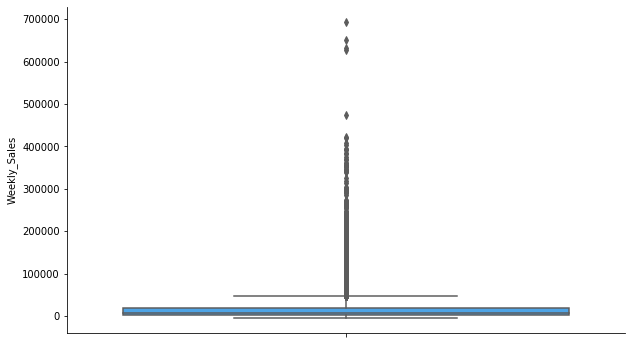

In [51]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=sales,
             y='Weekly_Sales', 
            color='#35A7FF' )
plt.ylabel('Weekly_Sales')
plt.xticks(rotation=45)
seaborn.despine()

Se observan muchos outliers con ventas semanales mucho más altas que el resto. Habría que analizar si al separar por tipo de tienda sigue apareciendo esta relación, ya que existen 3 tipos distintos de tiendas, y de distintos tamaños, lo que indica que puede ser lógico que una tienda tenga más ventas que otras.

In [52]:
features_1.describe(include='all')

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,IsMarkdown,Col3,is_na
count,8190.000000,8190,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000,8190.000000,8190.000000,8190,8190
unique,NaN,182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8190,2
top,NaN,2011-07-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,262011-03-18 00:00:00,True
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4140
first,NaN,2010-01-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2013-12-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821,0.071429,0.494505,NaN,NaN
std,12.987966,NaN,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259,0.257555,0.500000,NaN,NaN
min,1.000000,NaN,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000,0.000000,0.000000,NaN,NaN
25%,12.000000,NaN,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000,0.000000,0.000000,NaN,NaN


Podemos observar que en las columnas de MarkDown que sabemos que representan si hubo o no descuentos en esa semana, en algunos casos tienen valores negativos. Habría que analizar que representan realmente estos valores para entender si tiene sentido que esos valores sean negativos.

### Juntar las columnas de interés en un mismo DataFrame (Sales con Features).

In [53]:
sales_features = pd.merge(sales_1[['Weekly_Sales', 'Date', 'Store', 'Dept']], features_1[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday', 'Date', 'IsMarkdown', 'Store','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']], on=['Date', 'Store'])

In [54]:
sales_features.head(30)

,Weekly_Sales,Date,Store,Dept,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,IsMarkdown,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5
0,24924.50,2010-05-02,1,1,42.31,2.572,211.096358,8.106,0,0,NaN,NaN,NaN,NaN,NaN
1,50605.27,2010-05-02,1,2,42.31,2.572,211.096358,8.106,0,0,NaN,NaN,NaN,NaN,NaN
2,13740.12,2010-05-02,1,3,42.31,2.572,211.096358,8.106,0,0,NaN,NaN,NaN,NaN,NaN
3,39954.04,2010-05-02,1,4,42.31,2.572,211.096358,8.106,0,0,NaN,NaN,NaN,NaN,NaN
4,32229.38,2010-05-02,1,5,42.31,2.572,211.096358,8.106,0,0,NaN,NaN,NaN,NaN,NaN
5,5749.03,2010-05-02,1,6,42.31,2.572,211.096358,8.106,0,0,NaN,NaN,NaN,NaN,NaN
6,21084.08,2010-05-02,1,7,42.31,2.572,211.096358,8.106,0,0,NaN,NaN,NaN,NaN,NaN
7,40129.01,2010-05-02,1,8,42.31,2.572,211.096358,8.106,0,0,NaN,NaN,NaN,NaN,NaN
8,16930.99,2010-05-02,1,9,42.31,2.572,211.096358,8.106,0,0,NaN,NaN,NaN,NaN,NaN
9,30721.50,2010-05-02,1,10,42.31,2.572,211.096358,8.106,0,0,NaN,NaN,NaN,NaN,NaN


### Para simplificar el problema resamplear los datos ¿Transformar Weekly sales en ventas mensuales?. Graficar la distribución de las ventas mensuales para cada año para 5 tiendas a elección. Comparar sus distribuciones. ¿Se reconoce alguna distribución conocida?

In [55]:
def resample_store(store_id):
    store_sales = sales_1[sales_1.Store==store_id].copy()
    monthly = store_sales.loc[:, ['Weekly_Sales']]
    monthly = monthly.set_index(store_sales.Date)
    monthly['Weekly_Sales'] = pd.to_numeric(monthly['Weekly_Sales'], downcast='float', errors='coerce')
    monthly.rename(columns={'Weekly_Sales': 'Monthly_Sales'}, inplace=True)
    return monthly.resample('M').sum()

Ventas mensuales para la tienda 5:


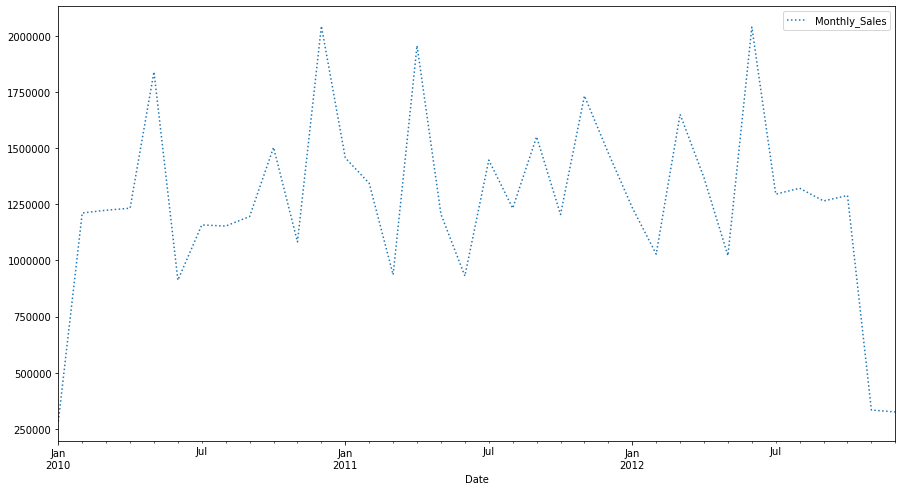

In [56]:
print('Ventas mensuales para la tienda 5:')
monthly_5 = resample_store(5)
monthly_5.plot(figsize=(15,8), style=[':', '--', '-'])

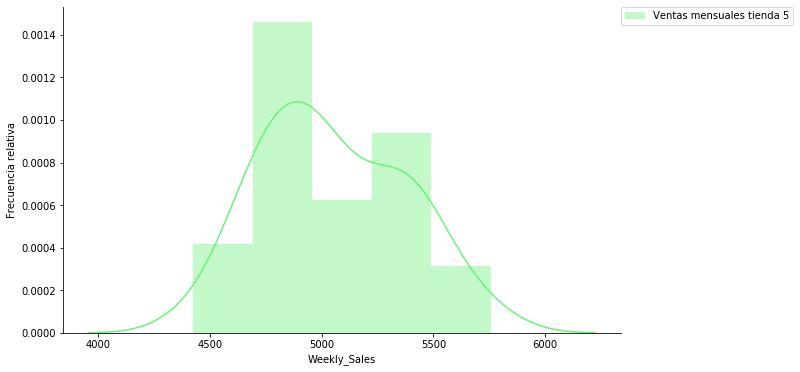

In [57]:
sl5=sales_1[sales_1['Store']==5].groupby([sales_1['Date'].dt.month,sales_1['Date'].dt.year]).agg('mean')
plt.figure(figsize=(10,6))
seaborn.distplot(sl5['Weekly_Sales'], bins=5, color='#6BF178', label='Ventas mensuales tienda 5')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.ylabel('Frecuencia relativa')
seaborn.despine()


Ventas mensuales para la tienda 15:


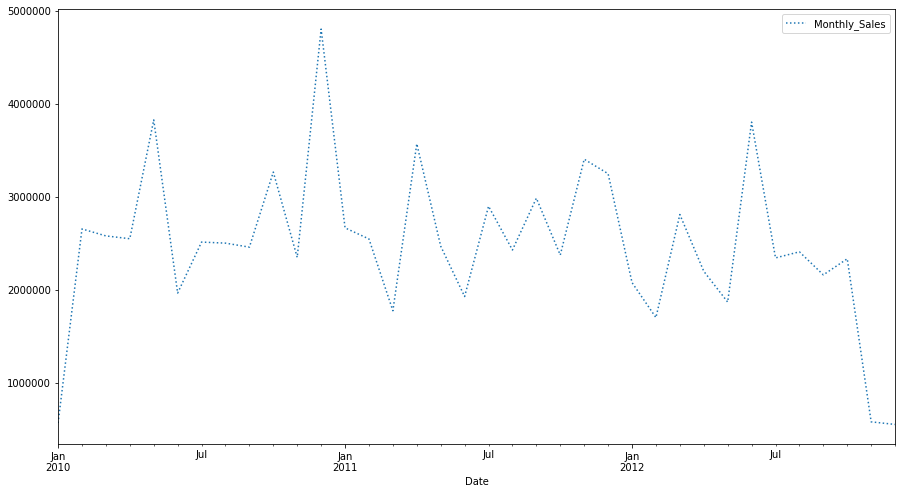

In [58]:
print('Ventas mensuales para la tienda 15:')
monthly_15 = resample_store(15)
monthly_15.plot(figsize=(15,8), style=[':', '--', '-'])

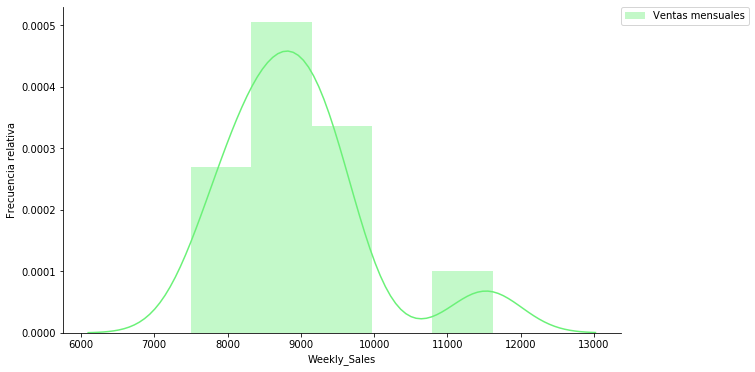

In [59]:
sl15=sales_1[sales_1['Store']==15].groupby([sales_1['Date'].dt.month,sales_1['Date'].dt.year]).agg('mean')
plt.figure(figsize=(10,6))
seaborn.distplot(sl15['Weekly_Sales'], bins=5, color='#6BF178', label='Ventas mensuales')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.ylabel('Frecuencia relativa')
seaborn.despine()

Ventas mensuales para la tienda 25:


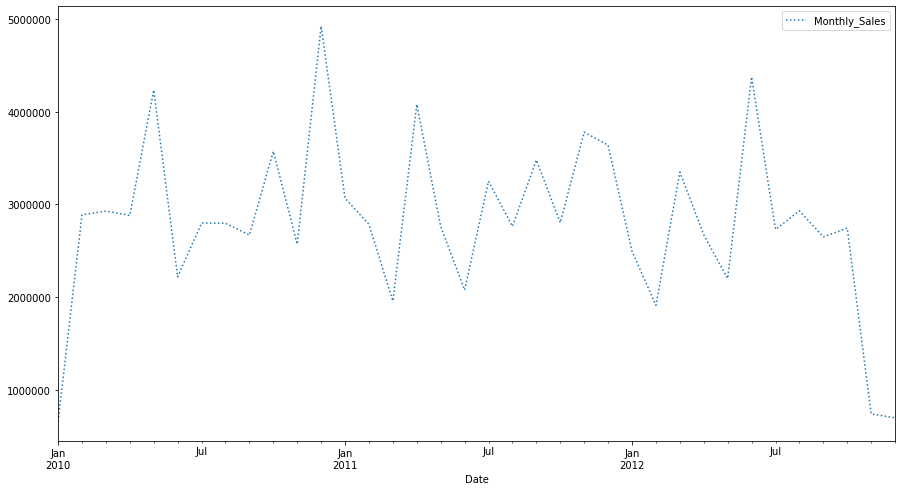

In [60]:
print('Ventas mensuales para la tienda 25:')
monthly_25 = resample_store(25)
monthly_25.plot(figsize=(15,8), style=[':', '--', '-'])

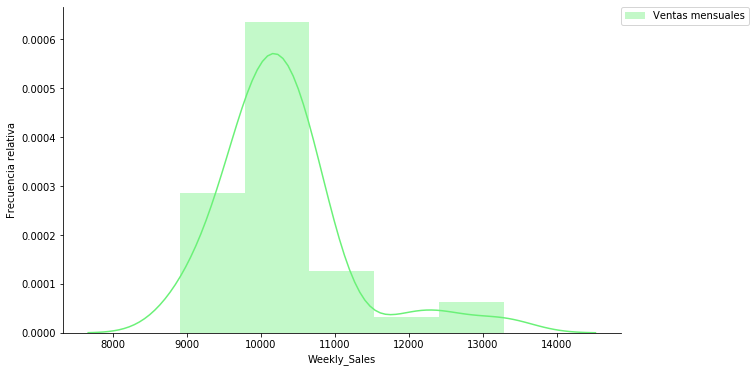

In [61]:
sl25=sales_1[sales_1['Store']==25].groupby([sales_1['Date'].dt.month,sales_1['Date'].dt.year]).agg('mean')
plt.figure(figsize=(10,6))
seaborn.distplot(sl25['Weekly_Sales'], bins=5, color='#6BF178', label='Ventas mensuales')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.ylabel('Frecuencia relativa')
seaborn.despine()

Ventas mensuales para la tienda 35:


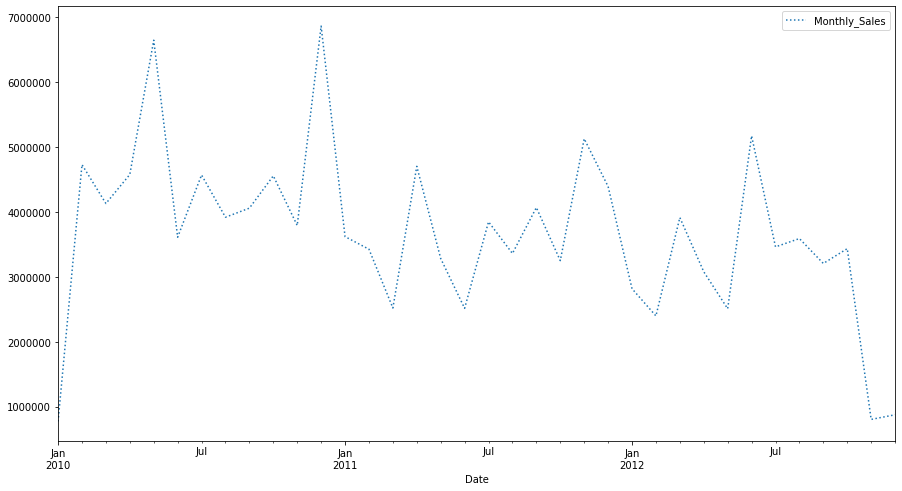

In [62]:
print('Ventas mensuales para la tienda 35:')
monthly_35 = resample_store(35)
monthly_35.plot(figsize=(15,8), style=[':', '--', '-'])

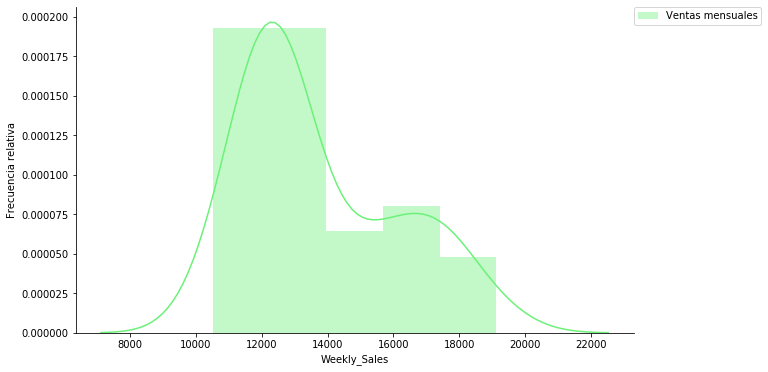

In [63]:
sl35=sales_1[sales_1['Store']==35].groupby([sales_1['Date'].dt.month,sales_1['Date'].dt.year]).agg('mean')
plt.figure(figsize=(10,6))
seaborn.distplot(sl35['Weekly_Sales'], bins=5, color='#6BF178', label='Ventas mensuales')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.ylabel('Frecuencia relativa')
seaborn.despine()

Ventas mensuales para la tienda 45:


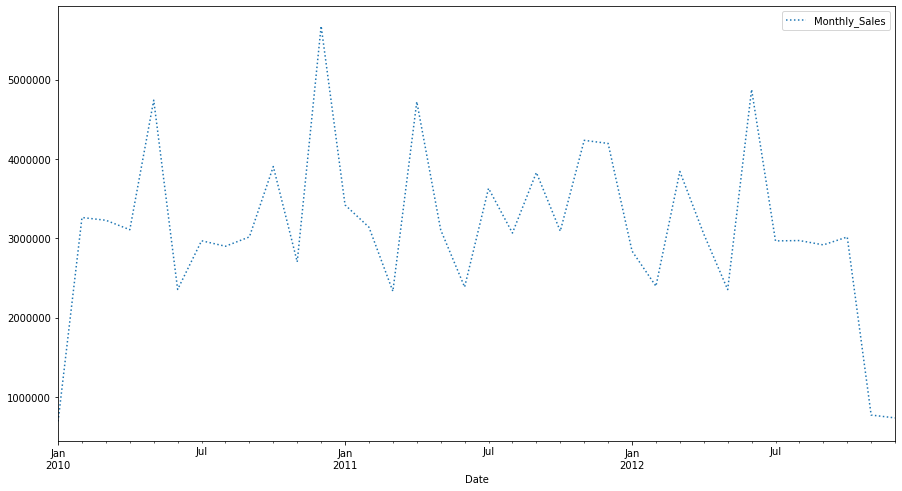

In [64]:
print('Ventas mensuales para la tienda 45:')
monthly_45 = resample_store(45)
monthly_45.plot(figsize=(15,8), style=[':', '--', '-'])

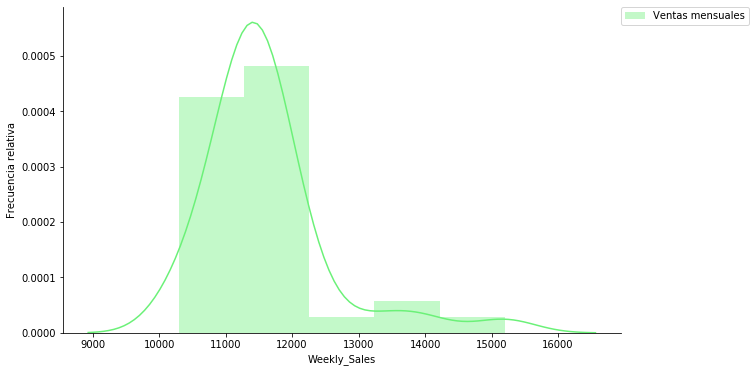

In [65]:
sl45=sales_1[sales_1['Store']==45].groupby([sales_1['Date'].dt.month,sales_1['Date'].dt.year]).agg('mean')
plt.figure(figsize=(10,6))
seaborn.distplot(sl45['Weekly_Sales'], bins=5, color='#6BF178', label='Ventas mensuales')
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
plt.ylabel('Frecuencia relativa')
seaborn.despine()

In [66]:
def get_normalized_variable(dataset, variable):
    """
    This method will be used to normalize a variable within a defined dataset
    """
    mean, std = stats.norm.fit(dataset[variable].dropna())
    return (dataset[variable].dropna() - mean) / std

In [67]:
print('KS Test tienda 5:')
stats.kstest(get_normalized_variable(sl5, 'Weekly_Sales'), 'norm')

KS Test tienda 5:


KstestResult(statistic=0.13103895965730894, pvalue=0.533775156659713)

In [68]:
print('KS Test tienda 15:')
stats.kstest(get_normalized_variable(sl15, 'Weekly_Sales'), 'norm')

KS Test tienda 15:


KstestResult(statistic=0.1500426148901084, pvalue=0.35834288144817855)

In [69]:
print('KS Test tienda 25:')
stats.kstest(get_normalized_variable(sl25, 'Weekly_Sales'), 'norm')

KS Test tienda 25:


KstestResult(statistic=0.1803334931193833, pvalue=0.17001372542990184)

In [70]:
print('KS Test tienda 35:')
stats.kstest(get_normalized_variable(sl35, 'Weekly_Sales'), 'norm')

KS Test tienda 35:


KstestResult(statistic=0.2228025053277049, pvalue=0.04739654108953296)

In [71]:
print('KS Test tienda 45:')
stats.kstest(get_normalized_variable(sl45, 'Weekly_Sales'), 'norm')

KS Test tienda 45:


KstestResult(statistic=0.19848341710301542, pvalue=0.10184011171100535)

Luego de haber aplicado los test de normalidad con los p-valores obtenidos no podemos afirmar que se corresponda a una distribución normal en ningún caso.

### Analizar correlación entre número departamento y ventas semanales/mensuales, ¿posee alguna incidencia el número de departamento sobre las ventas?, en caso negativo eliminar esta variable de nuestros dataframes.

In [72]:
sales_features.loc[:,['Weekly_Sales','Store']].corr(method ='spearman')

,Weekly_Sales,Store
Weekly_Sales,1.000000,-0.102241
Store,-0.102241,1.000000


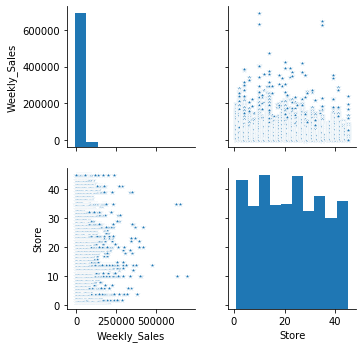

In [73]:
seaborn.pairplot(data=sales_features,
                 vars=['Weekly_Sales','Store'],
                 markers='*')
seaborn.despine()

De acuerdo al coeficiente de correlacion no puede inferirse que haya relacion lineal entre la variable Weekly Sales y Store. el grafico de dispersión refleja esta falta de relacion. por esta razon podemos eliminar la variable Departamento.

In [74]:
sales_features.drop('Dept', axis=1, inplace=True)
sales_features.drop('MarkDown1', axis=1, inplace=True)
sales_features.drop('MarkDown2', axis=1, inplace=True)
sales_features.drop('MarkDown3', axis=1, inplace=True)
sales_features.drop('MarkDown4', axis=1, inplace=True)
sales_features.drop('MarkDown5', axis=1, inplace=True)

In [75]:
sales_features.head(5)

,Weekly_Sales,Date,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,IsMarkdown
0,24924.50,2010-05-02,1,42.31,2.572,211.096358,8.106,0,0
1,50605.27,2010-05-02,1,42.31,2.572,211.096358,8.106,0,0
2,13740.12,2010-05-02,1,42.31,2.572,211.096358,8.106,0,0
3,39954.04,2010-05-02,1,42.31,2.572,211.096358,8.106,0,0
4,32229.38,2010-05-02,1,42.31,2.572,211.096358,8.106,0,0


In [86]:
sales_features = sales_features.groupby(['Date','Store'], as_index=False).agg({"Weekly_Sales": "sum","Temperature": "first","Fuel_Price": "first","CPI": "first","Unemployment": "first","IsHoliday": "first","IsMarkdown": "first"})

### Una vez que tenemos las features de interés de nuestro set de datos, aplicar algún método de normalización sobre los mismos, para evitar tener un sesgo de unas variables sobre otra (se pueden utilizar técnicas como z-score/min-max scaling). Guardar el dataset normalizado con un nombre representativo.

In [87]:
from scipy.stats import zscore

In [88]:
sales_features.columns

Index(['Date', 'Store', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'IsHoliday', 'IsMarkdown'],
      dtype='object')

In [90]:
numeric_cols = sales_features.drop(['IsHoliday', 'IsMarkdown', 'Store'], axis=1).select_dtypes(include=[np.number]).columns
sales_features[numeric_cols] = sales_features[numeric_cols].apply(zscore)
sales_features.head(5)

,Date,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,IsMarkdown
0,2010-01-10,1,0.591512,0.608682,-1.64626,1.018802,-0.085913,0,0
1,2010-01-10,2,1.429318,0.464999,-1.64626,1.010109,0.087352,0,0
2,2010-01-10,3,-1.304047,0.701397,-1.64626,1.102979,-0.231989,0,0
3,2010-01-10,4,1.461051,0.178720,-1.61140,-1.152213,-0.464964,0,0
4,2010-01-10,5,-1.525981,0.565848,-1.64626,1.032904,-0.656355,0,0


In [91]:
# Cambiar valores de IsMarkdown por 0 y 1

### Finalmente, reducir los features de interés mediante sus combinaciones lineales (aplicando Principal Component Analysis). 

In [95]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(sales_features[numeric_cols])# obtener los componentes principales

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [96]:
sales_features_pca=pca.transform(sales_features[numeric_cols]) # convertimos nuestros datos con las nuevas dimensiones de PCA
print("shape of X_pca", sales_features_pca.shape)
 

shape of X_pca (6435, 5)


In [97]:
expl = pca.explained_variance_ratio_
print(expl)

[0.26692338 0.23058166 0.21315308 0.18851809 0.1008238 ]


In [98]:
print('suma:',sum(expl[0:3]))
#Vemos que con 3 componentes tenemos algo mas del 54% de varianza explicada
 

suma: 0.7106581182281998


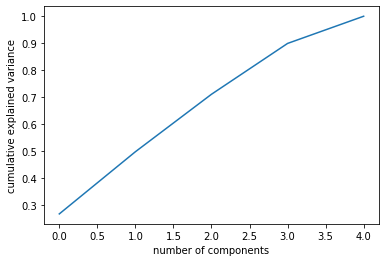

In [99]:
#graficamos el acumulado de varianza explicada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

No vale la pena utilizar componentes principales ya que  no hay 2 variables que representen toda la variacion sino que la misma esta muy distribuida

### Guardar el dataset con nombre representativo.

In [100]:
sales_features.to_csv(os.path.join(DATASET_PATH, 'sales_features.csv'))